In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Veri bilgisi
df.info()

# Eksik veri kontrolü
df.isnull().sum()

# İstatistiksel özet
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
#K-Means algoritması sayısal verilerle çalışır

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. ID sütununu çıkar
df_model=df.drop("CustomerID", axis=1)

# 2. Gender sütununu sayısal yap
le=LabelEncoder()
df_model["Genre"] = le.fit_transform(df_model["Genre"])
# Male = 1, Female = 0 (veya tam tersi)

# 3. Ölçeklendirme
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

# Ölçeklenmiş veriyi DataFrame olarak saklayalım
df_scaled = pd.DataFrame(df_scaled, columns=df_model.columns)

df_scaled.head()


# Neden ölçeklendiriyoruz?
# Çünkü Age 20–70 arasında değişirken Annual Income bin dolarlarda,
# Spending Score ise 1–100 arasında. Bu farklı ölçekler K-Means’in yanlış çalışmasına sebep olur.

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [7]:
# Elbow Method (Dirsek Yöntemi)
# K-Means’te “kaç küme olmalı?” sorusunun cevabını bulmak için Elbow Method kullanılır.
# Bu yöntemde, farklı küme sayılarında model kurulur ve inertia (küme içi mesafe toplamı) ölçülür.
# Grafikte “dirsek” şeklinde bir kırılma noktası varsa, o optimum küme sayısını verir.

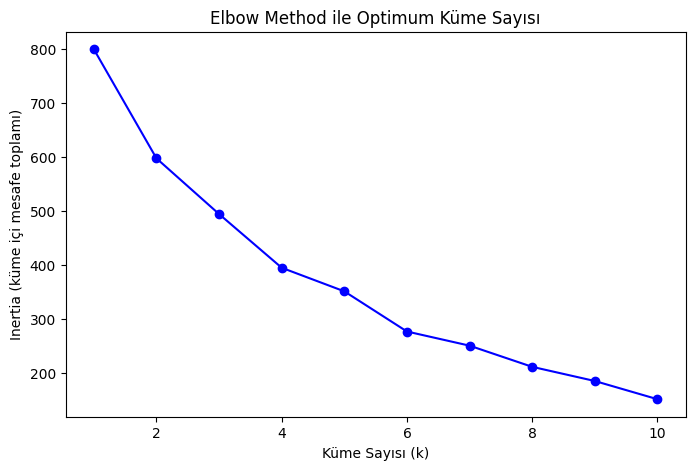

In [9]:
from sklearn.cluster import KMeans

inertia=[]
K=range(1,11) #1den 10 kümeye kadar dene

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#Görselleştirme
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (küme içi mesafe toplamı)")
plt.title("Elbow Method ile Optimum Küme Sayısı")
plt.show()


In [10]:
# Yorumlama:
# Grafikte inertia değeri küme sayısı arttıkça azalır (çünkü kümeler daha sıkı olur).
# Dirsek noktasındaki k değeri optimum küme sayısıdır.
# Genelde Mall Customers veri setinde bu değer k=5 civarında çıkar.

In [11]:
# K-Means ile Segment Oluşturma
# Optimum küme sayısını (örneğin k=5) kullanarak modelimizi eğitip,
# müşterileri farklı segmentlere ayıracağız.

In [12]:
# Optimum k değerini burada kullanıyoruz
kmeans = KMeans(n_clusters=5, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Orijinal veriye küme bilgisi ekleyelim
df["Cluster"] = df_scaled["Cluster"]

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


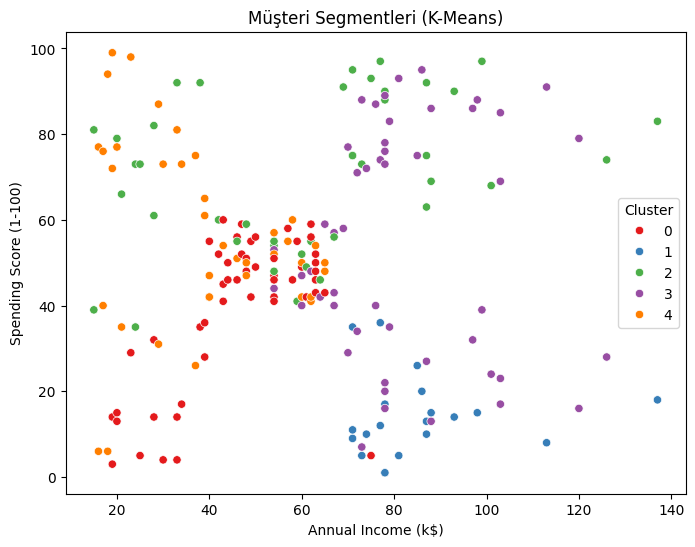

In [13]:
# Yaş, yıllık gelir ve harcama skorunu kullanarak kümeleri 2D grafikte görelim.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set1",
    data=df
)
plt.title("Müşteri Segmentleri (K-Means)")
plt.show()


In [14]:
# Burada:
# X ekseni = Yıllık gelir
# Y ekseni = Harcama skoru
# Renkler = Müşteri segmentleri

In [15]:
# Kümelerin Profillerini Analiz Etme
# Her küme için ortalama değerleri alarak müşteri tiplerini belirleyeceğiz.

In [16]:
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
cluster_profile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,65.333333,56.470588,46.098039,39.313725
1,159.500000,39.500000,85.150000,14.050000
2,100.809524,28.690476,60.904762,70.238095
3,151.510204,37.897959,82.122449,54.448980
4,50.526316,27.315789,38.842105,56.210526


In [ ]:
# Yorumlama Mantığı:

# Annual Income yüksek, Spending Score yüksek → 💎 Lüks tüketici

# Annual Income düşük, Spending Score yüksek → 🎯 Fiyat duyarlı ama aktif tüketici

# Annual Income yüksek, Spending Score düşük → 📉 Potansiyel müşteri

# Annual Income düşük, Spending Score düşük → 💤 Pasif müşteri

# Orta seviye → Karışık profil


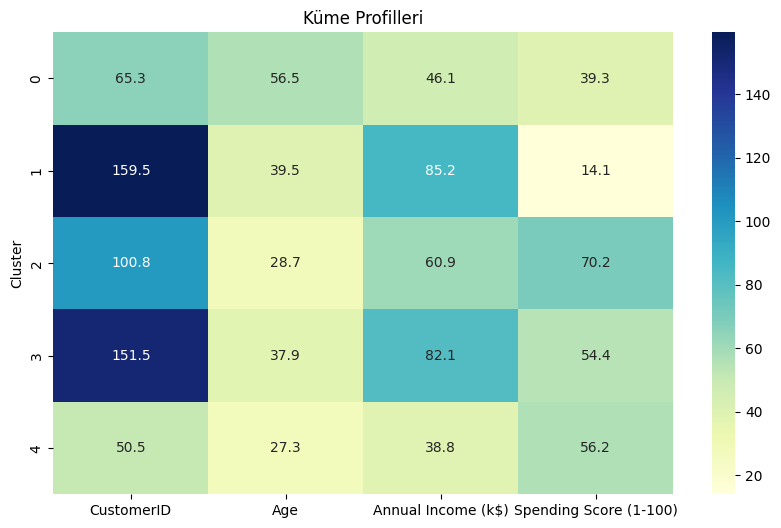

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Küme Profilleri")
plt.show()

In [20]:
# Bu heatmap her kümenin yaş, gelir ve harcama skorunu renklerle gösterir,
# hangi grubun hangi özelliklerde öne çıktığını kolayca görürüz.

In [21]:
# 3D GÖRSELLEŞTİRME
# Bu sayede Age – Annual Income – Spending Score üçlüsünde kümeleri aynı anda görebiliriz.

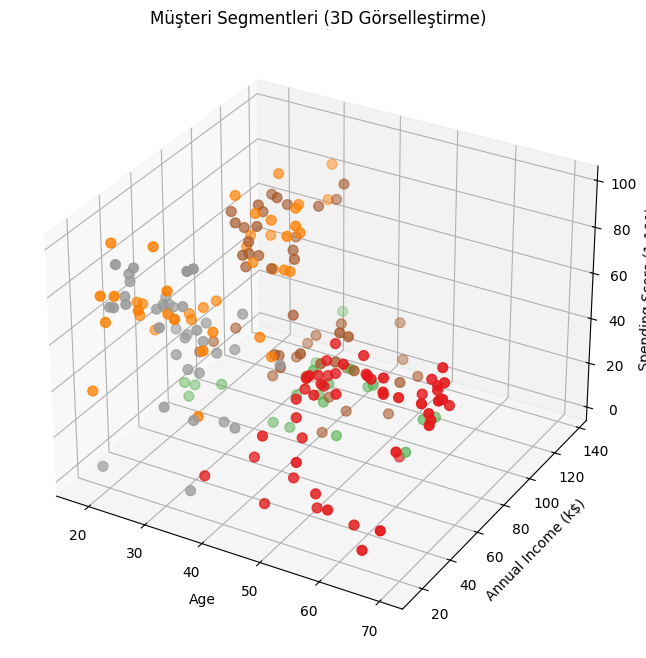

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["Age"], 
    df["Annual Income (k$)"], 
    df["Spending Score (1-100)"], 
    c=df["Cluster"], 
    cmap="Set1", 
    s=50
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Müşteri Segmentleri (3D Görselleştirme)")

plt.show()


In [23]:
# Avantajı:
# Segmentlerin yaş dağılımını da görebiliyorsun.
# “Genç – yüksek harcama – düşük gelir” gibi ilginç gruplar fark edilebilir.